# House Prices - Advanced Regression Techniques
The main goal of this project is to predict sales prices and practice feature engineering, RFs, and gradient boosting



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Data Cleaning

#### Handling Missing Values

<Axes: >

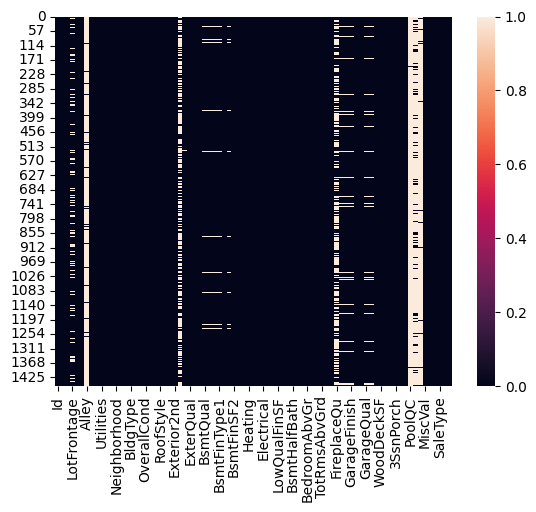

In [5]:
sns.heatmap(df.isnull())

In [6]:
n_rows = len(df)
n_rows

1460

In [7]:
# Find columns with more than 50% missing values
columns_with_missingvalues = df.columns[df.isnull().sum() > (n_rows/2)]
columns_with_missingvalues


Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [8]:
df.drop(columns_with_missingvalues, axis =1, inplace = True)

In [9]:
df.shape

(1460, 76)

#### Filling Missing Values

In [10]:
missing_value_columns = df.columns[df.isnull().sum() > 0]
missing_value_columns

Index(['LotFrontage', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond'],
      dtype='object')

In [11]:
df[missing_value_columns].isnull().sum()

LotFrontage     259
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [12]:
df[missing_value_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1201 non-null   float64
 1   MasVnrArea    1452 non-null   float64
 2   BsmtQual      1423 non-null   object 
 3   BsmtCond      1423 non-null   object 
 4   BsmtExposure  1422 non-null   object 
 5   BsmtFinType1  1423 non-null   object 
 6   BsmtFinType2  1422 non-null   object 
 7   Electrical    1459 non-null   object 
 8   FireplaceQu   770 non-null    object 
 9   GarageType    1379 non-null   object 
 10  GarageYrBlt   1379 non-null   float64
 11  GarageFinish  1379 non-null   object 
 12  GarageQual    1379 non-null   object 
 13  GarageCond    1379 non-null   object 
dtypes: float64(3), object(11)
memory usage: 159.8+ KB


In [13]:
#Filling Missing Values
#Fill the missing values like this for all columns
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())

df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])


In [14]:
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500


In [15]:
df.shape

(1460, 76)

<Axes: >

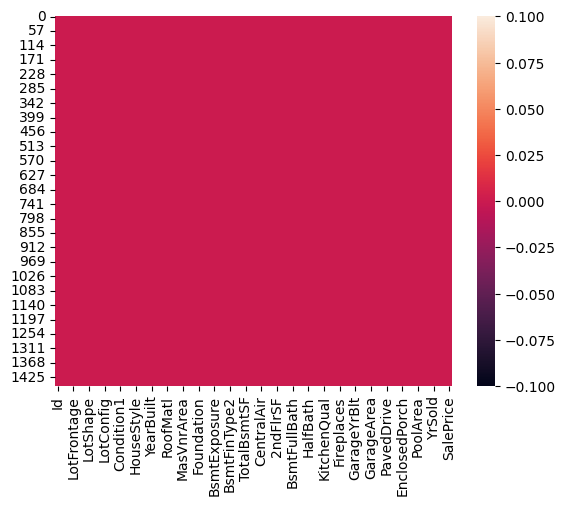

In [16]:
sns.heatmap(df.isnull())

* Now dataset has no null values

In [17]:
## Dropping ID column as well as it's not needed
df.drop('Id', axis =1, inplace = True)

In [18]:
df.shape

(1460, 75)

## Combining Test Data With Train Data

In [19]:
## Importing Cleaned Test Data file

df_test = pd.read_csv('/kaggle/input/updatedtest/UpdatedTest.csv')
df_test.shape

(1459, 74)

In [20]:
data = pd.concat([df, df_test], axis=0, ignore_index=True)

In [21]:
data.shape

(2919, 75)

In [22]:
full_data = data.copy()

## Feature Engineering

#### Handling Categorical features

In [23]:
cat_features = full_data.select_dtypes(include=['object']).columns
print(cat_features)


Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


In [24]:
full_data = pd.get_dummies(full_data, drop_first=True, dtype=int)
full_data.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,0,1,0,0,0,1,0


In [25]:
duplicates  = full_data.T.duplicated()
duplicates.sum()

0

* No duplicate column was found

## Split the dataset in training and test

* Already knows the number of rows that was there in the training dataset so based on the rows will split

In [26]:
#Split back to train and test dataset
train_data = full_data.iloc[:1460,:]
test_data = full_data.iloc[1460:,:]

In [27]:
test_data['SalePrice'].isnull().sum()

1459

In [28]:
#Droping the Sales Price column from test_data as it has only null values
test_data = test_data.drop(['SalePrice'], axis = 1)

In [29]:
test_data.shape

(1459, 233)

In [30]:
x_train = train_data.drop(['SalePrice'], axis = 1)
y_train = train_data['SalePrice']

## Apply XGBoostRegressor Algorithm

In [31]:
!pip install xgboost
import xgboost as xgb

xgb_model = xgb.XGBRegressor()
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [32]:
y_pred = xgb_model.predict(test_data)
y_pred

array([126716.3  , 159652.72 , 192800.67 , ..., 161463.14 , 114533.664,
       204581.36 ], dtype=float32)

In [33]:
pred = pd.DataFrame(y_pred)
sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
dataset = pd.concat([sub_df['Id'],pred], axis = 1)
dataset.columns = ['Id', 'SalePrice']
dataset.to_csv('submission.csv', index=False)

## Evaluate the model

In [34]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(sub_df['SalePrice'],pred[0]))
print(rmse)

74025.06213336266


## Hyperparameter Tuning
Will use XGBoost with hyperparameter to get better accuracy in prediction

In [35]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np


In [36]:
y_train_log = np.log1p(y_train)

In [37]:
# Defining Parameter Grid

param_grid = {
    "n_estimators": [500, 1000, 2000, 5000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [2, 3, 4, 5],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "reg_alpha": [0, 0.01, 0.1, 1],   # L1 regularization
    "reg_lambda": [1, 1.5, 2]         # L2 regularization
}


In [38]:
# Runing Randomized Search

xgb_model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,             # number of parameter settings sampled
    scoring="neg_root_mean_squared_error",
    cv=5,                  # 5-fold cross validation
    verbose=2,
    n_jobs=-1
)

random_search.fit(x_train, y_train_log)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [500, 1000, 2000, 5000],
                                        'reg_alpha': [0, 0.01, 0.1, 1],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [39]:
# Best Parameters & Model
print("Best Parameters:", random_search.best_params_)
print("Best CV Score (log RMSE):", -random_search.best_score_)


Best Parameters: {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.1, 'n_estimators': 5000, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.6}
Best CV Score (log RMSE): 0.1219937260547711


In [40]:
best_model = random_search.best_estimator_
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=5000, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

## Prediction on Test Data

In [41]:
# Predicting on Test Data

y_pred_log_test = best_model.predict(test_data)
y_pred = np.expm1(y_pred_log_test)
sub_df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

# To create sumbission file
submission = pd.DataFrame({"Id": sub_df['Id'], "SalePrice": y_pred})
submission.to_csv("submission_tuned.csv", index=False)